In [13]:
import os
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pykeen
import torch
from pykeen.pipeline import pipeline

In [21]:
dataset = 'Nations'
num_epochs = 10
embedding_dim = 50
lbda = 0.9
loss = 'MarginRankingLoss'

In [24]:
from pykeen.models import StructuredEmbedding

def find(t, v):
    return (t[..., None] == v).nonzero()

class ModifiedSE(StructuredEmbedding):
    
    def score_hrt(self, hrt_batch: torch.LongTensor) -> torch.FloatTensor:
        # Get embeddings
        
        nunq = torch.unique(torch.cat((hrt_batch[:,0],hrt_batch[:,2]),dim=0),dim=0)
        
        x = self.entity_embeddings(indices=nunq).view(-1, 1)
        h = self.entity_embeddings(indices=hrt_batch[:, 0]).view(-1, self.embedding_dim, 1)
        t = self.entity_embeddings(indices=hrt_batch[:, 2]).view(-1, self.embedding_dim, 1)
        rel_h = self.left_relation_embeddings(indices=hrt_batch[:, 1]).view(-1, self.embedding_dim, self.embedding_dim)
        rel_t = self.right_relation_embeddings(indices=hrt_batch[:, 1]).view(-1, self.embedding_dim, self.embedding_dim)  
        
        for triple in self.triples_factory.mapped_triples:
            print(triple)
        
        B = torch.zeros((nunq.shape[0]*self.embedding_dim, hrt_batch.shape[0]*self.embedding_dim), device=self.device)
        for i in range(hrt_batch.shape[0]):
            triple = hrt_batch[i]
            hix = (nunq == triple[0]).nonzero()[0]
            tix = (nunq == triple[2]).nonzero()[0]
#             hix = hixs[i][0]
#             tix = tixs[i][0]
            B[hix*self.embedding_dim:(hix+1)*self.embedding_dim, i*rel_h[i].shape[0]:(i+1)*rel_h[i].shape[1]] = rel_h[i]
            B[tix*self.embedding_dim:(tix+1)*self.embedding_dim, i*rel_t[i].shape[0]:(i+1)*rel_t[i].shape[1]] = -rel_t[i]
        
        L = B @ B.T
        
        # Project entities
        proj_h = rel_h @ h
        proj_t = rel_t @ t
        Lv = L @ x
        xLv = x.T @ Lv
#         scores = -torch.norm(proj_h - proj_t, dim=1, p=self.scoring_fct_norm)
#         scores = -torch.norm(Lv, dim=0, p=2)
        return - xLv

In [25]:
result2 = pipeline(
    model=ModifiedSE,
    dataset=dataset,
    random_seed=1235,
    device='gpu',
    training_kwargs=dict(num_epochs=num_epochs, batch_size=50),
    model_kwargs=dict(embedding_dim=embedding_dim),
    loss=loss,
#     regularizer='LpRegularizer'
)
model2 = result2.model
model2

tensor([0, 3, 2])
tensor([0, 3, 3])
tensor([ 0,  3, 10])
tensor([ 0,  3, 13])
tensor([ 0,  4, 11])
tensor([ 0,  4, 12])
tensor([0, 6, 2])
tensor([0, 6, 3])
tensor([ 0,  6, 10])
tensor([ 0,  6, 13])
tensor([0, 7, 1])
tensor([0, 7, 4])
tensor([0, 7, 7])
tensor([0, 7, 8])
tensor([0, 8, 9])
tensor([ 0,  8, 11])
tensor([ 0,  8, 12])
tensor([0, 9, 3])
tensor([0, 9, 5])
tensor([ 0,  9, 12])
tensor([ 0,  9, 13])
tensor([ 0, 13, 12])
tensor([ 0, 14,  4])
tensor([ 0, 14,  5])
tensor([ 0, 14,  9])
tensor([ 0, 14, 10])
tensor([ 0, 14, 12])
tensor([ 0, 14, 13])
tensor([ 0, 15, 12])
tensor([ 0, 18,  9])
tensor([ 0, 18, 11])
tensor([ 0, 19,  2])
tensor([ 0, 19,  3])
tensor([ 0, 19,  4])
tensor([ 0, 19,  9])
tensor([ 0, 19, 11])
tensor([ 0, 19, 12])
tensor([ 0, 19, 13])
tensor([ 0, 20,  4])
tensor([ 0, 20,  5])
tensor([ 0, 20,  6])
tensor([ 0, 20,  7])
tensor([ 0, 20,  9])
tensor([ 0, 20, 11])
tensor([ 0, 20, 12])
tensor([ 0, 21,  3])
tensor([ 0, 21,  5])
tensor([ 0, 21,  9])
tensor([ 0, 21, 11])
tens

tensor([ 0,  9, 12])
tensor([ 0,  9, 13])
tensor([ 0, 13, 12])
tensor([ 0, 14,  4])
tensor([ 0, 14,  5])
tensor([ 0, 14,  9])
tensor([ 0, 14, 10])
tensor([ 0, 14, 12])
tensor([ 0, 14, 13])
tensor([ 0, 15, 12])
tensor([ 0, 18,  9])
tensor([ 0, 18, 11])
tensor([ 0, 19,  2])
tensor([ 0, 19,  3])
tensor([ 0, 19,  4])
tensor([ 0, 19,  9])
tensor([ 0, 19, 11])
tensor([ 0, 19, 12])
tensor([ 0, 19, 13])
tensor([ 0, 20,  4])
tensor([ 0, 20,  5])
tensor([ 0, 20,  6])
tensor([ 0, 20,  7])
tensor([ 0, 20,  9])
tensor([ 0, 20, 11])
tensor([ 0, 20, 12])
tensor([ 0, 21,  3])
tensor([ 0, 21,  5])
tensor([ 0, 21,  9])
tensor([ 0, 21, 11])
tensor([ 0, 24, 12])
tensor([ 0, 25,  2])
tensor([ 0, 27,  3])
tensor([ 0, 27,  4])
tensor([ 0, 27,  5])
tensor([ 0, 27,  9])
tensor([ 0, 27, 10])
tensor([ 0, 27, 11])
tensor([ 0, 27, 12])
tensor([ 0, 28,  5])
tensor([ 0, 28,  9])
tensor([ 0, 28, 10])
tensor([ 0, 28, 11])
tensor([ 0, 28, 12])
tensor([ 0, 29, 12])
tensor([ 0, 32, 11])
tensor([ 0, 32, 12])
tensor([ 0, 3

tensor([0, 3, 2])
tensor([0, 3, 3])
tensor([ 0,  3, 10])
tensor([ 0,  3, 13])
tensor([ 0,  4, 11])
tensor([ 0,  4, 12])
tensor([0, 6, 2])
tensor([0, 6, 3])
tensor([ 0,  6, 10])
tensor([ 0,  6, 13])
tensor([0, 7, 1])
tensor([0, 7, 4])
tensor([0, 7, 7])
tensor([0, 7, 8])
tensor([0, 8, 9])
tensor([ 0,  8, 11])
tensor([ 0,  8, 12])
tensor([0, 9, 3])
tensor([0, 9, 5])
tensor([ 0,  9, 12])
tensor([ 0,  9, 13])
tensor([ 0, 13, 12])
tensor([ 0, 14,  4])
tensor([ 0, 14,  5])
tensor([ 0, 14,  9])
tensor([ 0, 14, 10])
tensor([ 0, 14, 12])
tensor([ 0, 14, 13])
tensor([ 0, 15, 12])
tensor([ 0, 18,  9])
tensor([ 0, 18, 11])
tensor([ 0, 19,  2])
tensor([ 0, 19,  3])
tensor([ 0, 19,  4])
tensor([ 0, 19,  9])
tensor([ 0, 19, 11])
tensor([ 0, 19, 12])
tensor([ 0, 19, 13])
tensor([ 0, 20,  4])
tensor([ 0, 20,  5])
tensor([ 0, 20,  6])
tensor([ 0, 20,  7])
tensor([ 0, 20,  9])
tensor([ 0, 20, 11])
tensor([ 0, 20, 12])
tensor([ 0, 21,  3])
tensor([ 0, 21,  5])
tensor([ 0, 21,  9])
tensor([ 0, 21, 11])
tens

tensor([13, 19,  4])
tensor([13, 19,  9])
tensor([13, 19, 10])
tensor([13, 19, 11])
tensor([13, 19, 12])
tensor([13, 20,  9])
tensor([13, 20, 10])
tensor([13, 20, 11])
tensor([13, 20, 12])
tensor([13, 21,  5])
tensor([13, 21,  9])
tensor([13, 21, 10])
tensor([13, 21, 11])
tensor([13, 21, 12])
tensor([13, 24,  3])
tensor([13, 24, 10])
tensor([13, 25,  2])
tensor([13, 25, 11])
tensor([13, 25, 12])
tensor([13, 26,  2])
tensor([13, 26, 12])
tensor([13, 27,  9])
tensor([13, 27, 10])
tensor([13, 28,  0])
tensor([13, 28,  4])
tensor([13, 28,  5])
tensor([13, 28,  7])
tensor([13, 28,  9])
tensor([13, 28, 10])
tensor([13, 28, 11])
tensor([13, 29, 11])
tensor([13, 29, 12])
tensor([13, 30,  2])
tensor([13, 30,  5])
tensor([13, 30, 11])
tensor([13, 31, 12])
tensor([13, 32, 11])
tensor([13, 33,  1])
tensor([13, 33,  2])
tensor([13, 33,  3])
tensor([13, 33,  4])
tensor([13, 33,  5])
tensor([13, 33,  6])
tensor([13, 33,  9])
tensor([13, 33, 10])
tensor([13, 33, 11])
tensor([13, 34,  5])
tensor([13, 3

tensor([10, 38, 13])
tensor([10, 39,  5])
tensor([10, 39,  7])
tensor([10, 39,  9])
tensor([10, 39, 11])
tensor([10, 39, 12])
tensor([10, 39, 13])
tensor([10, 42,  2])
tensor([10, 42,  9])
tensor([10, 42, 12])
tensor([10, 44, 12])
tensor([10, 45,  0])
tensor([10, 45,  2])
tensor([10, 45,  3])
tensor([10, 45,  4])
tensor([10, 45,  5])
tensor([10, 45,  9])
tensor([10, 45, 11])
tensor([10, 45, 12])
tensor([10, 46, 13])
tensor([10, 47, 13])
tensor([10, 49,  9])
tensor([10, 49, 11])
tensor([10, 49, 12])
tensor([10, 49, 13])
tensor([10, 51,  5])
tensor([10, 51,  9])
tensor([10, 51, 11])
tensor([10, 54,  7])
tensor([10, 54, 12])
tensor([11,  3,  2])
tensor([11,  3, 10])
tensor([11,  3, 13])
tensor([11,  4, 13])
tensor([11,  6,  2])
tensor([11,  6,  3])
tensor([11,  6, 10])
tensor([11,  6, 13])
tensor([11,  7,  1])
tensor([11,  7,  4])
tensor([11,  7,  5])
tensor([11,  7,  6])
tensor([11,  7,  7])
tensor([11,  7,  8])
tensor([11,  8,  0])
tensor([11,  8,  9])
tensor([11,  8, 12])
tensor([11,  

tensor([0, 3, 2])
tensor([0, 3, 3])
tensor([ 0,  3, 10])
tensor([ 0,  3, 13])
tensor([ 0,  4, 11])
tensor([ 0,  4, 12])
tensor([0, 6, 2])
tensor([0, 6, 3])
tensor([ 0,  6, 10])
tensor([ 0,  6, 13])
tensor([0, 7, 1])
tensor([0, 7, 4])
tensor([0, 7, 7])
tensor([0, 7, 8])
tensor([0, 8, 9])
tensor([ 0,  8, 11])
tensor([ 0,  8, 12])
tensor([0, 9, 3])
tensor([0, 9, 5])
tensor([ 0,  9, 12])
tensor([ 0,  9, 13])
tensor([ 0, 13, 12])
tensor([ 0, 14,  4])
tensor([ 0, 14,  5])
tensor([ 0, 14,  9])
tensor([ 0, 14, 10])
tensor([ 0, 14, 12])
tensor([ 0, 14, 13])
tensor([ 0, 15, 12])
tensor([ 0, 18,  9])
tensor([ 0, 18, 11])
tensor([ 0, 19,  2])
tensor([ 0, 19,  3])
tensor([ 0, 19,  4])
tensor([ 0, 19,  9])
tensor([ 0, 19, 11])
tensor([ 0, 19, 12])
tensor([ 0, 19, 13])
tensor([ 0, 20,  4])
tensor([ 0, 20,  5])
tensor([ 0, 20,  6])
tensor([ 0, 20,  7])
tensor([ 0, 20,  9])
tensor([ 0, 20, 11])
tensor([ 0, 20, 12])
tensor([ 0, 21,  3])
tensor([ 0, 21,  5])
tensor([ 0, 21,  9])
tensor([ 0, 21, 11])
tens

tensor([13, 50, 12])
tensor([13, 51,  5])
tensor([13, 51,  7])
tensor([13, 51,  9])
tensor([13, 51, 11])
tensor([13, 54,  7])
tensor([13, 54,  9])
tensor([13, 54, 11])
tensor([13, 54, 12])
tensor([0, 3, 2])
tensor([0, 3, 3])
tensor([ 0,  3, 10])
tensor([ 0,  3, 13])
tensor([ 0,  4, 11])
tensor([ 0,  4, 12])
tensor([0, 6, 2])
tensor([0, 6, 3])
tensor([ 0,  6, 10])
tensor([ 0,  6, 13])
tensor([0, 7, 1])
tensor([0, 7, 4])
tensor([0, 7, 7])
tensor([0, 7, 8])
tensor([0, 8, 9])
tensor([ 0,  8, 11])
tensor([ 0,  8, 12])
tensor([0, 9, 3])
tensor([0, 9, 5])
tensor([ 0,  9, 12])
tensor([ 0,  9, 13])
tensor([ 0, 13, 12])
tensor([ 0, 14,  4])
tensor([ 0, 14,  5])
tensor([ 0, 14,  9])
tensor([ 0, 14, 10])
tensor([ 0, 14, 12])
tensor([ 0, 14, 13])
tensor([ 0, 15, 12])
tensor([ 0, 18,  9])
tensor([ 0, 18, 11])
tensor([ 0, 19,  2])
tensor([ 0, 19,  3])
tensor([ 0, 19,  4])
tensor([ 0, 19,  9])
tensor([ 0, 19, 11])
tensor([ 0, 19, 12])
tensor([ 0, 19, 13])
tensor([ 0, 20,  4])
tensor([ 0, 20,  5])
tens

tensor([12, 38,  0])
tensor([12, 38,  9])
tensor([12, 38, 11])
tensor([12, 39,  0])
tensor([12, 39,  5])
tensor([12, 39,  7])
tensor([12, 39,  9])
tensor([12, 39, 11])
tensor([12, 40, 11])
tensor([12, 41,  7])
tensor([12, 41,  8])
tensor([12, 41,  9])
tensor([12, 41, 11])
tensor([12, 41, 13])
tensor([12, 44, 11])
tensor([12, 45,  2])
tensor([12, 45,  4])
tensor([12, 45,  5])
tensor([12, 45, 11])
tensor([12, 45, 13])
tensor([12, 46,  2])
tensor([12, 46,  3])
tensor([12, 47,  0])
tensor([12, 47,  5])
tensor([12, 47,  7])
tensor([12, 47,  8])
tensor([12, 47,  9])
tensor([12, 47, 13])
tensor([12, 48,  9])
tensor([12, 48, 11])
tensor([12, 49,  0])
tensor([12, 49,  3])
tensor([12, 49,  4])
tensor([12, 49,  5])
tensor([12, 49,  7])
tensor([12, 49,  9])
tensor([12, 49, 11])
tensor([12, 49, 13])
tensor([12, 51, 11])
tensor([12, 52,  2])
tensor([12, 54,  1])
tensor([12, 54,  4])
tensor([12, 54,  5])
tensor([12, 54,  8])
tensor([12, 54, 10])
tensor([12, 54, 11])
tensor([13,  0,  2])
tensor([13,  

tensor([11, 46,  2])
tensor([11, 46,  4])
tensor([11, 47,  4])
tensor([11, 47,  5])
tensor([11, 47,  7])
tensor([11, 47,  8])
tensor([11, 47,  9])
tensor([11, 47, 12])
tensor([11, 47, 13])
tensor([11, 48,  7])
tensor([11, 48,  9])
tensor([11, 48, 12])
tensor([11, 48, 13])
tensor([11, 49,  4])
tensor([11, 49,  5])
tensor([11, 49,  7])
tensor([11, 49,  8])
tensor([11, 49,  9])
tensor([11, 49, 10])
tensor([11, 49, 12])
tensor([11, 49, 13])
tensor([11, 51,  0])
tensor([11, 51,  1])
tensor([11, 51,  3])
tensor([11, 51,  4])
tensor([11, 51,  5])
tensor([11, 51,  7])
tensor([11, 51,  9])
tensor([11, 51, 10])
tensor([11, 51, 13])
tensor([11, 53,  6])
tensor([11, 54,  0])
tensor([11, 54,  1])
tensor([11, 54,  4])
tensor([11, 54,  5])
tensor([11, 54,  7])
tensor([11, 54,  8])
tensor([11, 54,  9])
tensor([11, 54, 10])
tensor([11, 54, 12])
tensor([11, 54, 13])
tensor([12,  0,  2])
tensor([12,  0, 13])
tensor([12,  3,  1])
tensor([12,  3,  2])
tensor([12,  3,  3])
tensor([12,  3,  4])
tensor([12,  

KeyboardInterrupt: 

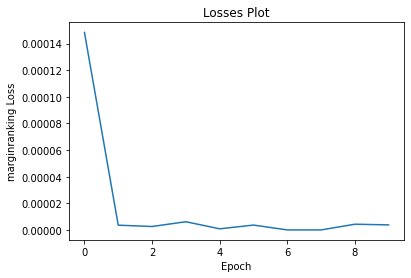

In [5]:
result2.plot_losses()
plt.show()

In [6]:
comp_models = ['StructuredEmbedding','TransE','RotatE','HolE']
comp_results = []
for comp_model in comp_models:
    print('Running {}'.format(comp_model))
    result = pipeline(
        dataset=dataset,
        model=comp_model,
        random_seed=1235,
        device='gpu',
        training_kwargs=dict(num_epochs=num_epochs),  # Shouldn't take more than a minute or two on a nice computer
        model_kwargs=dict(embedding_dim=embedding_dim),
        loss=loss
    )
    comp_results.append(result)

Running StructuredEmbedding


INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


INFO:pykeen.evaluation.evaluator:Evaluation took 1.23s seconds



Running TransE


INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds



Running RotatE


INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds



Running HolE


/home/gebhart/anaconda3/envs/sheaf_kg/lib/python3.7/site-packages/pykeen/models/unimodal/hole.py:103: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  a_fft = torch.rfft(h, signal_ndim=1, onesided=True)
/home/gebhart/anaconda3/envs/sheaf_kg/lib/python3.7/site-packages/pykeen/models/unimodal/hole.py:113: UserWarning: The function torch.irfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.ifft or torch.fft.irfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:602.)
  composite = torch.irfft(p_fft, signal_ndim=1, onesided=True, signal_sizes=(h.shape[-1],))


INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...


INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.22s seconds


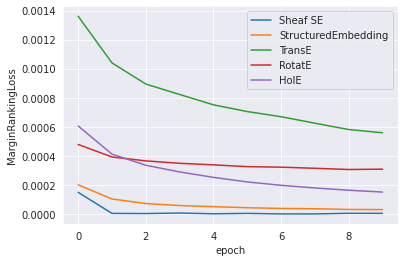

In [7]:
plt.plot(np.arange(len(result2.losses)),result2.losses,label='Sheaf SE')
for i in range(len(comp_models)):
    comp_model = comp_models[i]
    comp_result = comp_results[i]
    plt.plot(np.arange(len(comp_result.losses)),comp_result.losses,label=comp_model)
plt.ylabel(str(result.model.loss).replace('()',''))
plt.xlabel('epoch')
plt.legend()
plt.show()

In [8]:
res_df = result2.metric_results.to_df()

In [9]:
compto = 0

In [10]:
res_df['diff'] = res_df.Value - comp_results[compto].metric_results.to_df().Value
res_df

,Side,Type,Metric,Value,diff
0,both,avg,adjusted_mean_rank,1.003708,0.646814
1,head,avg,adjusted_mean_rank,1.030543,0.437194
2,tail,avg,adjusted_mean_rank,0.976873,0.856434
3,both,best,mean_rank,975.200766,640.515317
4,both,best,mean_reciprocal_rank,0.003169,-0.059642
5,both,best,hits_at_1,0.000000,-0.018600
6,both,best,hits_at_3,0.000274,-0.060175
7,both,best,hits_at_5,0.001094,-0.086433
8,both,best,hits_at_10,0.002735,-0.140317
9,both,worst,mean_rank,975.200766,640.515044


In [11]:
# comp_results[0].model.score_all_triples()

In [12]:
# model2.score_all_triples()